In [24]:

import numpy as np 
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
sns.set()


In [25]:
import sklearn 
from sklearn.datasets import load_boston 
boston = load_boston() 
bos = pd.DataFrame(boston.data) 
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
!pip install statsmodels

In [27]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [28]:
bos.isna().sum()   #checking null values

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

C:\Users\ankur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

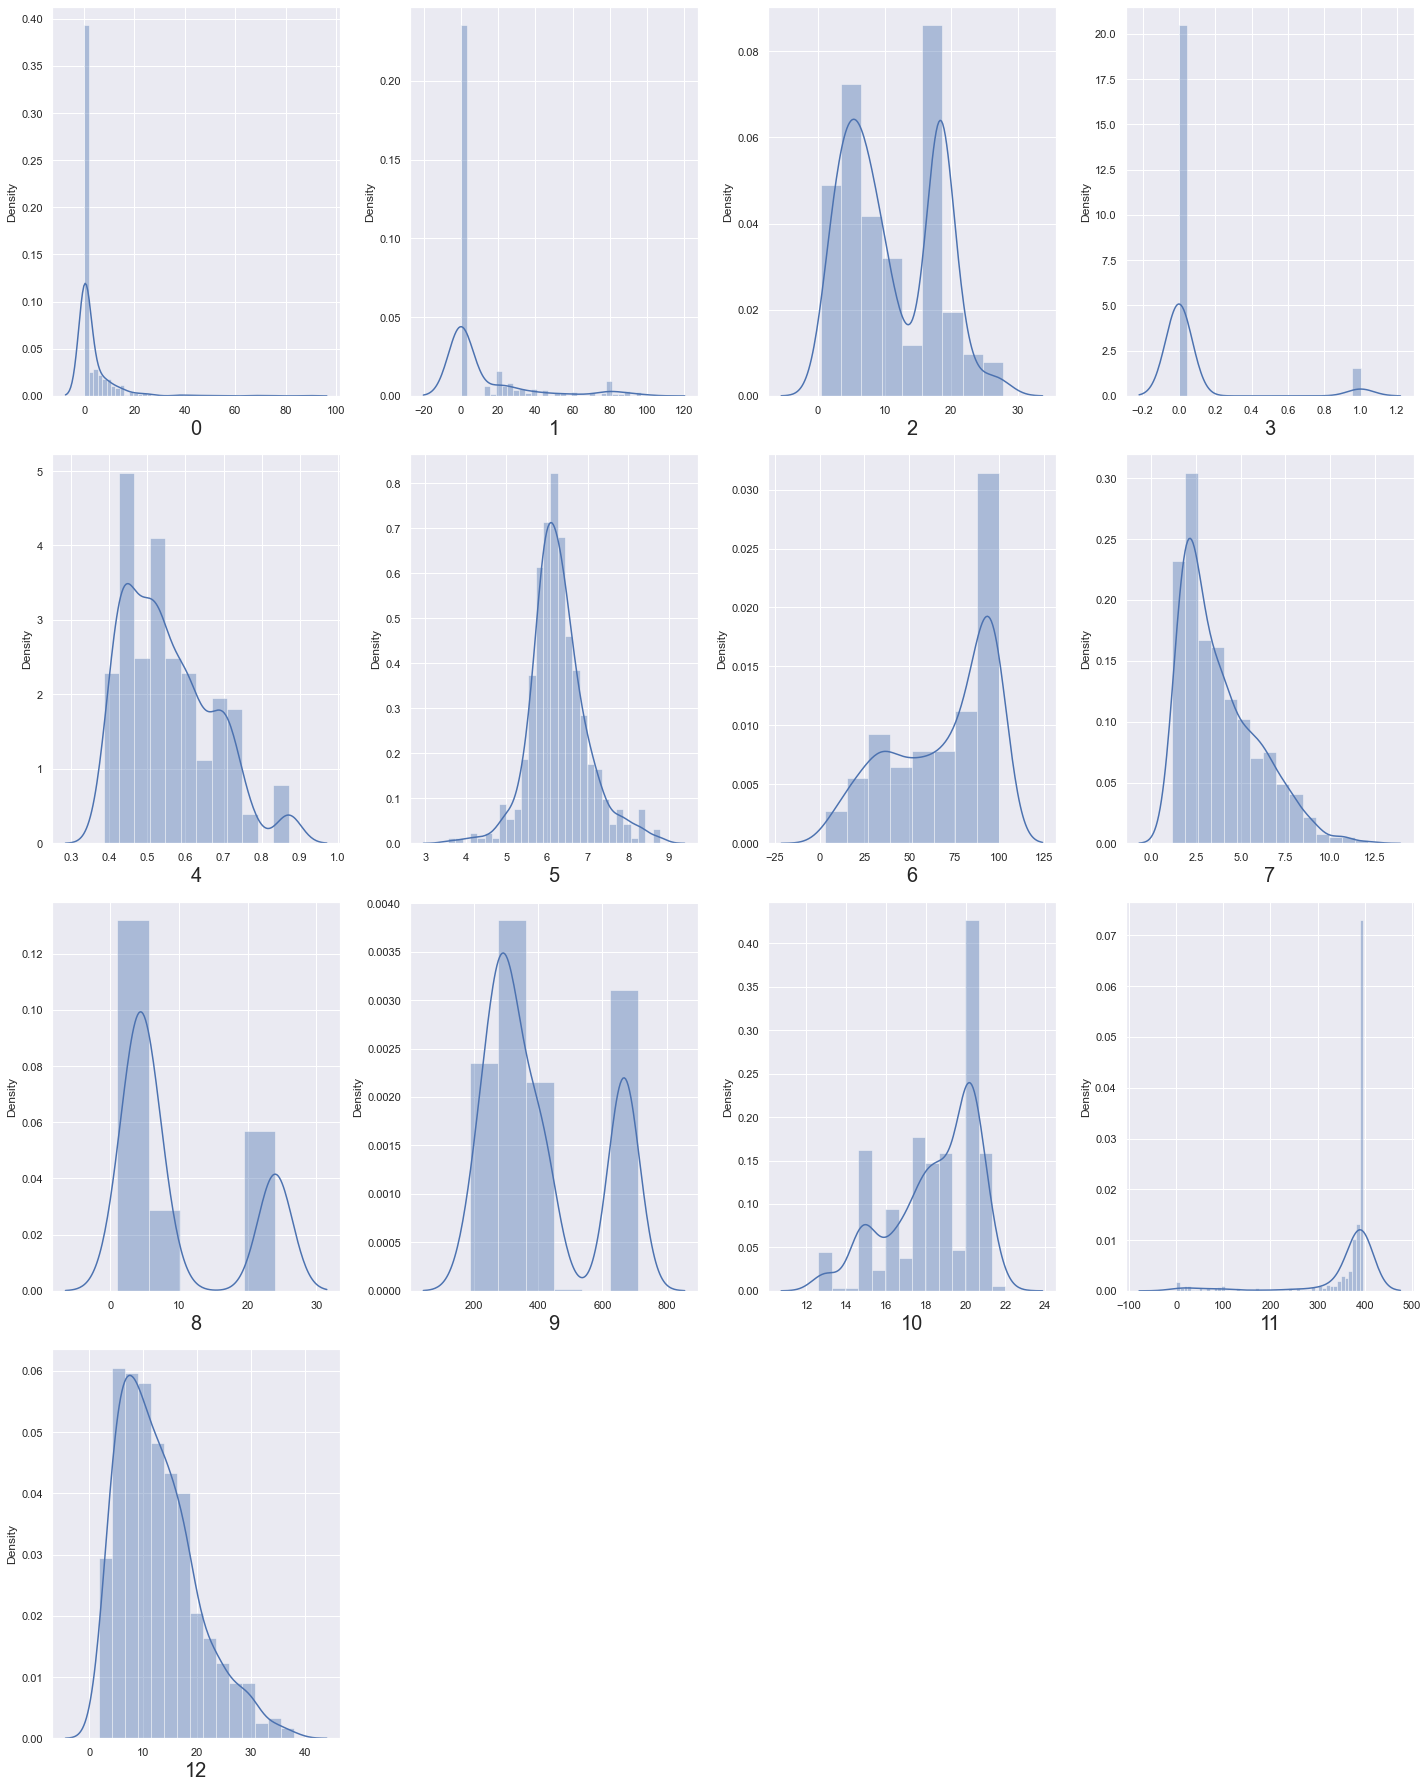

In [29]:
# visualize independent and dependent values

plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in bos:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.tight_layout()   
plt.show()

In [30]:
y = bos[12]
X = bos.drop(columns = [12])

KeyError: 12

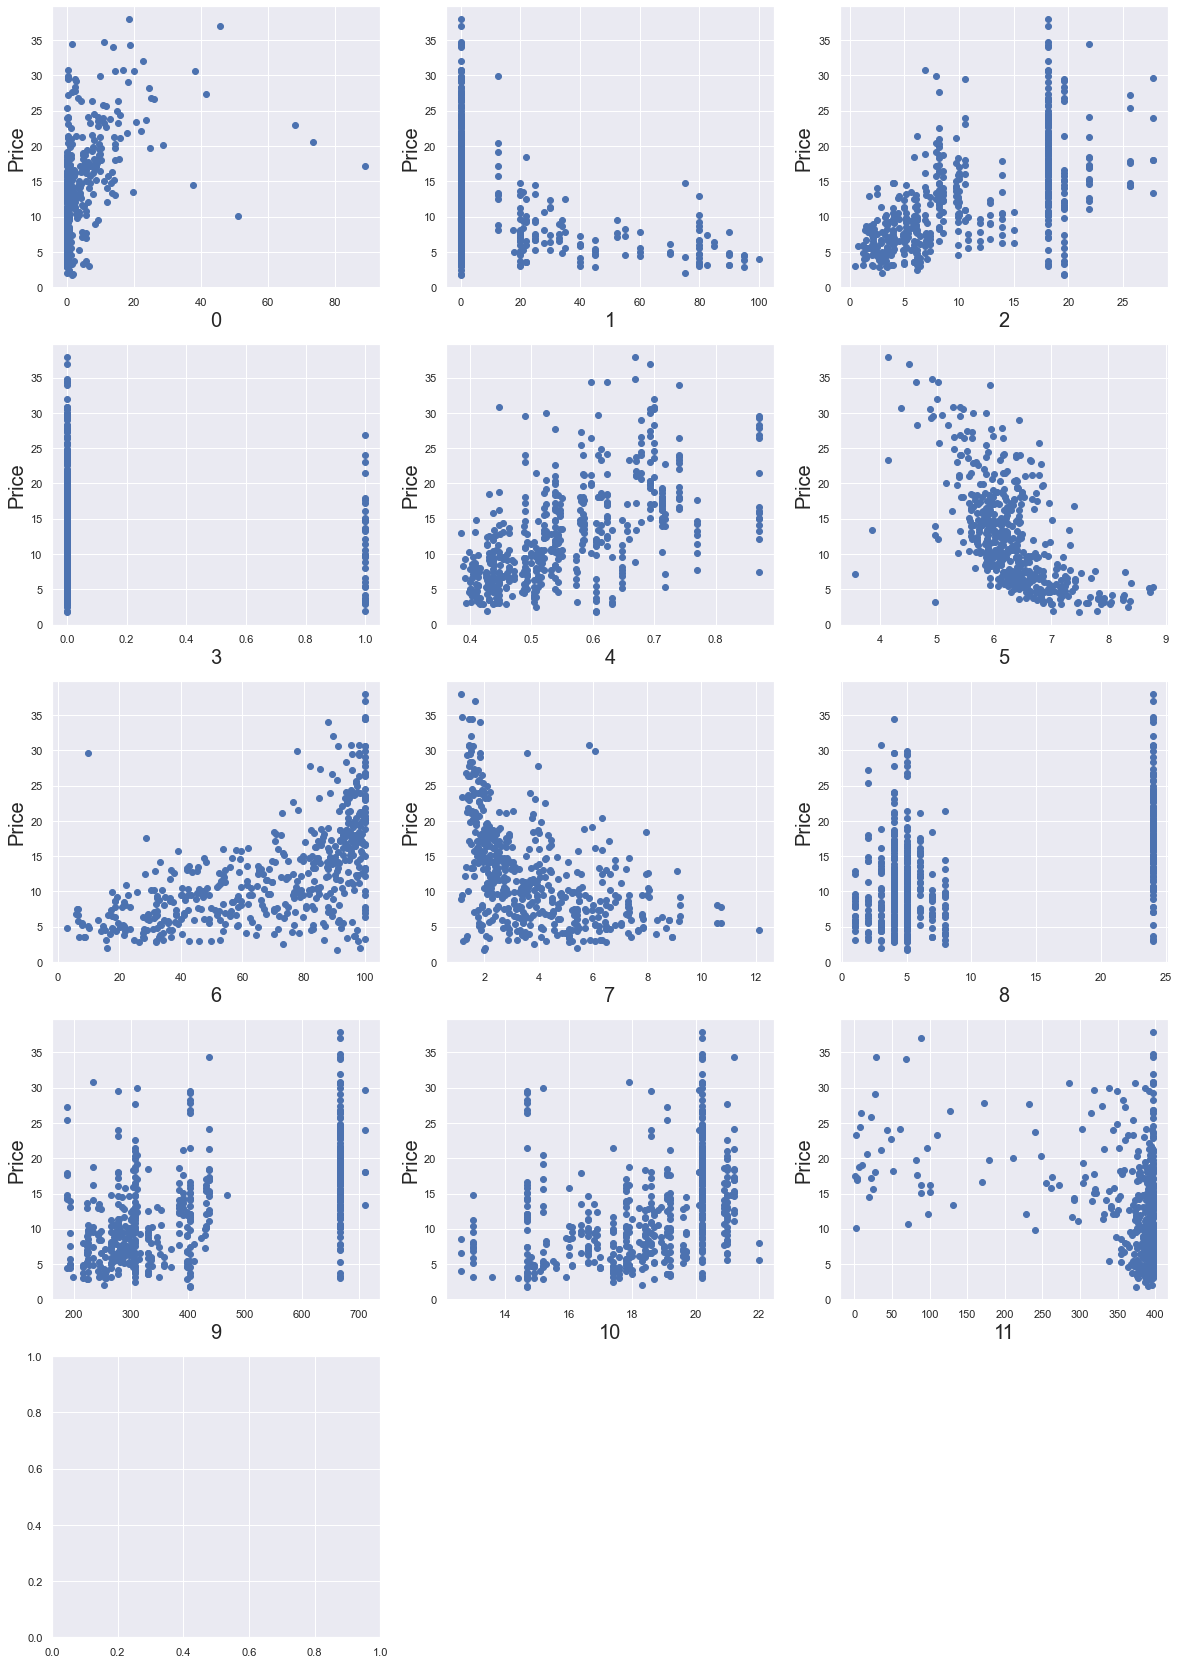

In [31]:
plt.figure(figsize = (20, 30), facecolor = 'white')

plotnumber = 1
for column in bos:
    if plotnumber <=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column], y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Price', fontsize = 20)
    plotnumber+=1
plt.tight_layout()   
plt.show()

In [32]:
#lets check multicollinearity

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

In [36]:
#we create new dataframe which will include all vif

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['Fatures'] = X.columns
vif

,VIF,Fatures
0,1.750401,0
1,2.292269,1
2,3.968425,2
3,1.070202,3
4,4.372942,4
5,1.380407,5
6,2.740023,6
7,3.950097,7
8,7.474983,8
9,9.006439,9


In [38]:
#linear regression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3)
y_train

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [42]:
#checking r2 score

def adj_r2(x, y):
    r2 = regression.score(x, y)
    n = X.shape[0]
    p = X.shape[1]
    
    adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adjusted_r2


    

In [43]:
regression.score(X_train, y_train)  #r2 score

0.7152607864007687

In [44]:
adj_r2(X_train, y_train)  #adjusted r2 score

0.7083300144673188

In [45]:
regression.score(X_test, y_test)

0.5088012297822984

In [47]:
adj_r2(X_test, y_test)

0.4968450731035713

In [48]:
#our model score is less on test data

#check oberfitting

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [49]:
alpha = lassocv.alpha_
alpha

0.007840161987111216

In [51]:
#now that we have best parameter lest use lasso regression

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)


Lasso(alpha=0.007840161987111216)

In [52]:
lasso_reg.score(X_test, y_test)

0.510203551218597

In [55]:
regression.predict(X_test)

array([23.18302846, 11.72105514,  9.44157452, 14.62797682,  4.78108403,
        9.55410404,  5.81374956, 11.11906586, 26.7460749 , 14.64835536,
       21.23101177, 11.24237459,  5.13457523, 10.58101702, 10.81550155,
        3.4722902 , 16.96018097,  6.29546229, 15.96490402, 15.60086649,
        9.87431583,  8.52178277,  5.9256421 , 18.24721784, 11.13759229,
        6.40091515, 24.93988023,  2.57289969, 21.04795107,  9.68709318,
        9.90265927, 11.93687462,  7.91415596, 11.5537378 , 19.42845051,
       14.71734121, 11.67799291, 23.48080506, 12.09847579, 16.39354626,
        5.46194392, 16.29946224, 14.52842913,  1.85774304, 12.49335241,
       13.20565975, 11.81706669, 11.25753802, 15.24898106, 13.10606711,
       10.26596549, 21.11422119, 12.71865008,  3.6174284 ,  8.16966053,
        9.45364975, 17.52417771, 17.44233639, 14.60277031, 17.89642688,
       11.91715456, 11.19869045, 12.90709052, 10.20878495, 15.30317525,
       15.47422348, 17.56141759, 14.13709873,  9.37752564, 13.25